### Training an autoencoder for the digits dataset 

In [ ]:
%load_ext autoreload
%autoreload 2

In [188]:
from nn.nn import NeuralNetwork
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd 

In [200]:
#load in digits dataset 

#digits.data is shape (1794, 64) --> 64 is flattened image pixels 
digits = load_digits()
  
#split into train and test sets 
X_train, X_test, y_train, y_test=train_test_split(digits.data, digits.target, train_size=0.8, random_state=3)
X_train.shape

(1437, 64)

In [202]:
y_train.shape

(1437,)

Before running the final model, we'll tune some hyperparamters. The input dimensions will remain unchanged as they were defined in the assignment. I chose relu for the activation function because -------. I also chose MSE for the loss function since the goal of this autoencoder is reconstruction, not classification. I will also keep the number of epochs the same. However, I will tune the learning rate and batch size used. 

In [241]:
#tune some hyperparameters 


#test lr, batch_size
lr_test=[0.01, 0.001, 0.0001]
batch_size_test=[50, 100, 200, 400]

hyperparameters=[(x, y) for x in lr_test for y in batch_size_test]



val_loss_list=[]
#go through hyperparameters 
for hp in hyperparameters:
    print('lr, batch_size:', hp)
        
    run_NN = NeuralNetwork(nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
                                      {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}],
                                    lr = hp[0], seed = 3, batch_size = hp[1], epochs = 500, 
                                    loss_function='mse', verbose=False)
    
    per_epoch_loss_train, per_epoch_loss_val=run_NN.fit(X_train, X_train, X_test, X_test)
    
    
    #store average of the last 10 epochs of validation loss 
    val_loss_list.append(np.mean(per_epoch_loss_val[-10:]))

In [242]:
#look at the loss 
#select hyperparameters with minimum validation loss 
hp_idx=np.argmin(val_loss_list)
print(np.min(val_loss_list))

print(hyperparameters[hp_idx])

60.20594618055556
(0.01, 50)


We've selected the final hyperparameters as -------. If I had more time, I'd do some cross validation to ensure that ------. However, we will proceed as follows. 

In [243]:
example_NN = NeuralNetwork(nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
                                      {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}],
                                lr = 0.01, seed = 3, batch_size = 50, epochs = 500, 
                               loss_function='mse', verbose=True)


#params are arrays of W1-Wx where x is feature number
#and also an array for b1 

In [244]:
#YOU FOOL
#BC IT'S AN AUTOENCODER INPUT AND OUTPUT SHOULD BE THE SAME GLAKSDJF'LAKSDFJ'
per_epoch_loss_train, per_epoch_loss_val=example_NN.fit(X_train, X_train, X_test, X_test)

epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400


In [237]:
#let's ignore the fact that there is something very wrong 

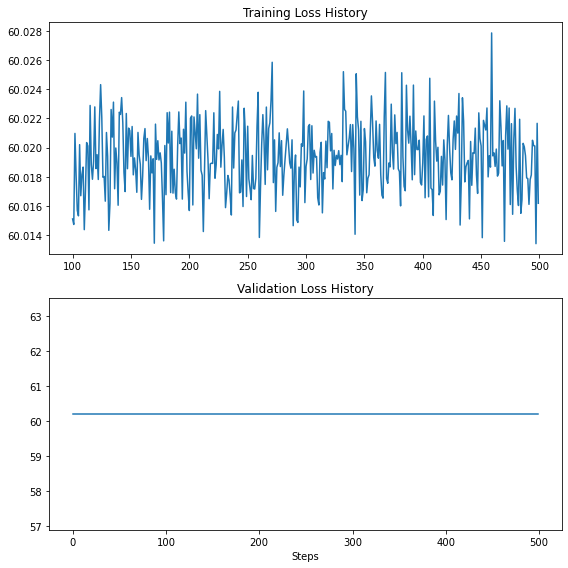

In [245]:
#code from hw7
#plot training and reconstruction loss for final model

fig, axs = plt.subplots(2, figsize=(8, 8))
axs[0].plot(np.arange(len(per_epoch_loss_train))[100:], per_epoch_loss_train[100:])
axs[0].set_title('Training Loss History')
axs[1].plot(np.arange(len(per_epoch_loss_val)), per_epoch_loss_val)
axs[1].set_title('Validation Loss History')
plt.xlabel('Steps')
fig.tight_layout()
plt.show()

array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
#finally, look at some examples of reconstructed vs true values  

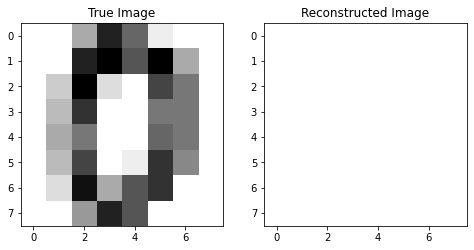

In [235]:
#make prediction with tuned autoencoder 

digits_pred=example_NN.predict(X_test)

#for index 0

idx_0_reshape= np.reshape(digits_pred[0], (8, 8))


fig, axs = plt.subplots(1,2, figsize=(8, 8))

axs[0].imshow(digits.images[0], cmap='binary')
axs[1].imshow(idx_0_reshape, cmap='binary')
axs[0].set_title('True Image')
axs[1].set_title('Reconstructed Image')

plt.show()

In [225]:
digit_pred.shape

(360, 64)

In [227]:
digit_pred[0].shape

(64,)